# Bayesian Linear Regression

Simple Linear Regression Results:
Mean Squared Error: 0.5111
R^2 Score: 0.8698
Coefficient: [[2.79002054]]
Intercept: [4.10611051]

Bayesian Ridge Results:
Mean Squared Error: 0.5112
R^2 Score: 0.8698
Coefficient: [2.77779708]
Intercept: 4.117592209152521

ARD Regression Results:
Mean Squared Error: 0.5112
R^2 Score: 0.8698
Coefficient: [2.77779708]
Intercept: 4.117592209152523


/Users/nguyennguyen/Documents/Clinical Bioinfo/MLAI/BINF-5507-Assignment-2/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nguyennguyen/Documents/Clinical Bioinfo/MLAI/BINF-5507-Assignment-2/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


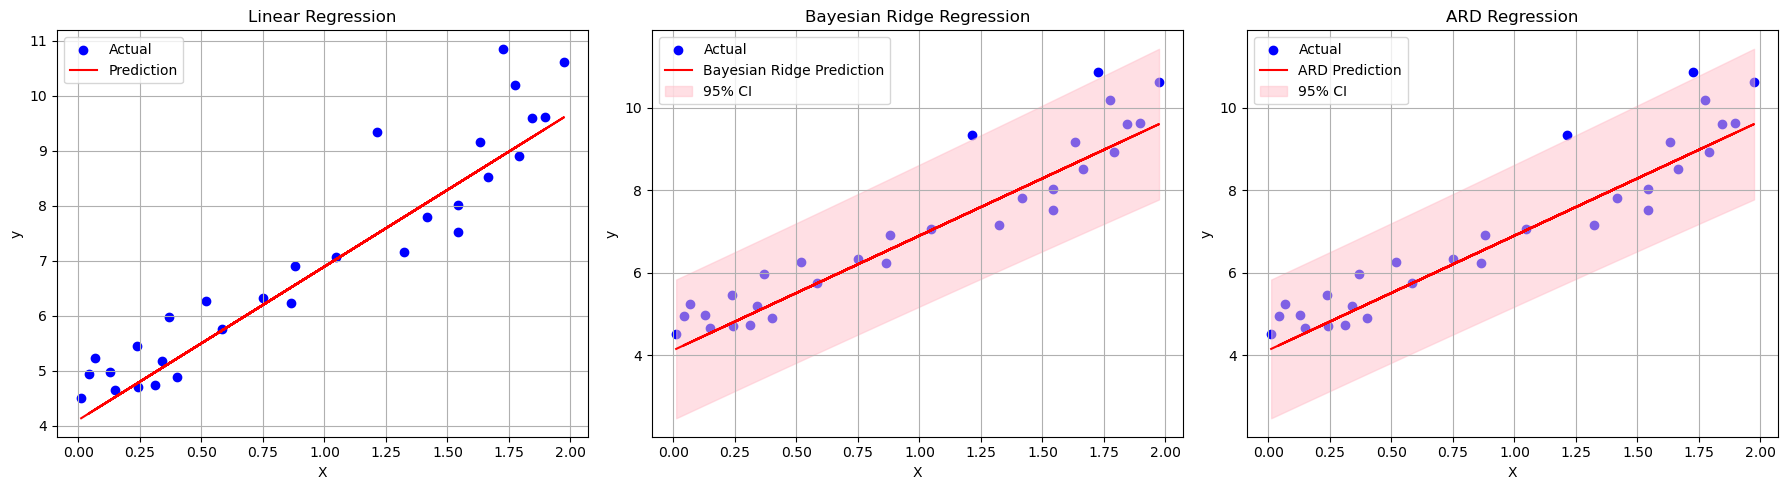

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge, ARDRegression
from sklearn.metrics import mean_squared_error, r2_score

noise_factor = 0.9

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) * noise_factor

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ===================== Linear Regression =====================
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

print("Simple Linear Regression Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lin):.4f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_lin):.4f}")
print("Coefficient:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)

# ===================== Bayesian Ridge =====================
bayes_reg = BayesianRidge()
bayes_reg.fit(X_train, y_train)
y_pred_bayes, y_std_bayes = bayes_reg.predict(X_test, return_std=True)

print("\nBayesian Ridge Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_bayes):.4f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_bayes):.4f}")
print("Coefficient:", bayes_reg.coef_)
print("Intercept:", bayes_reg.intercept_)

# ===================== ARD Regression =====================
ard_reg = ARDRegression()
ard_reg.fit(X_train, y_train)
y_pred_ard, y_std_ard = ard_reg.predict(X_test, return_std=True)

print("\nARD Regression Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_ard):.4f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_ard):.4f}")
print("Coefficient:", ard_reg.coef_)
print("Intercept:", ard_reg.intercept_)

# ===================== Plotting =====================

# Sort test points for smooth lines
sorted_idx = np.argsort(X_test.squeeze())
X_sorted = X_test.squeeze()[sorted_idx]

# Compute CI for ARD
ci_upper_ard = y_pred_ard + 1.96 * y_std_ard        # 1.96 standard deviations is ~ 95% CI
ci_lower_ard = y_pred_ard - 1.96 * y_std_ard

# Compute CI for Bayesian Ridge
ci_upper_bayes = y_pred_bayes + 1.96 * y_std_bayes
ci_lower_bayes = y_pred_bayes - 1.96 * y_std_bayes

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# ----- Linear Regression -----
ax[0].scatter(X_test, y_test, color='blue', label='Actual')
ax[0].plot(X_test, y_pred_lin, color='red', label='Prediction')
ax[0].set_title('Linear Regression')
ax[0].set_xlabel('X')
ax[0].set_ylabel('y')
ax[0].legend()
ax[0].grid(True)

# ----- Bayesian Ridge -----
ax[1].scatter(X_test, y_test, color='blue', label='Actual')
ax[1].plot(X_test, y_pred_bayes, color='red', label='Bayesian Ridge Prediction')
ax[1].fill_between(X_sorted,
                   ci_lower_bayes[sorted_idx],
                   ci_upper_bayes[sorted_idx],
                   color='pink', alpha=0.5, label='95% CI')
ax[1].set_title('Bayesian Ridge Regression')
ax[1].set_xlabel('X')
ax[1].set_ylabel('y')
ax[1].legend()
ax[1].grid(True)

# ----- ARD Regression -----
ax[2].scatter(X_test, y_test, color='blue', label='Actual')
ax[2].plot(X_test, y_pred_ard, color='red', label='ARD Prediction')
ax[2].fill_between(X_sorted,
                   ci_lower_ard[sorted_idx],
                   ci_upper_ard[sorted_idx],
                   color='pink', alpha=0.5, label='95% CI')
ax[2].set_title('ARD Regression')
ax[2].set_xlabel('X')
ax[2].set_ylabel('y')
ax[2].legend()
ax[2].grid(True)

plt.tight_layout()
plt.show()


Simple Polynomial Regression Results:
Mean squared error: 1.4421
R2 value: 0.4176

Bayesian Regression (BayesianRidge) Results:
Mean squared error: 0.6581
R2 value: 0.7342

Bayesian Regression (ARDRegression) Results:
Mean squared error: 0.6999
R2 value: 0.7173


/Users/nguyennguyen/Documents/Clinical Bioinfo/MLAI/BINF-5507-Assignment-2/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nguyennguyen/Documents/Clinical Bioinfo/MLAI/BINF-5507-Assignment-2/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


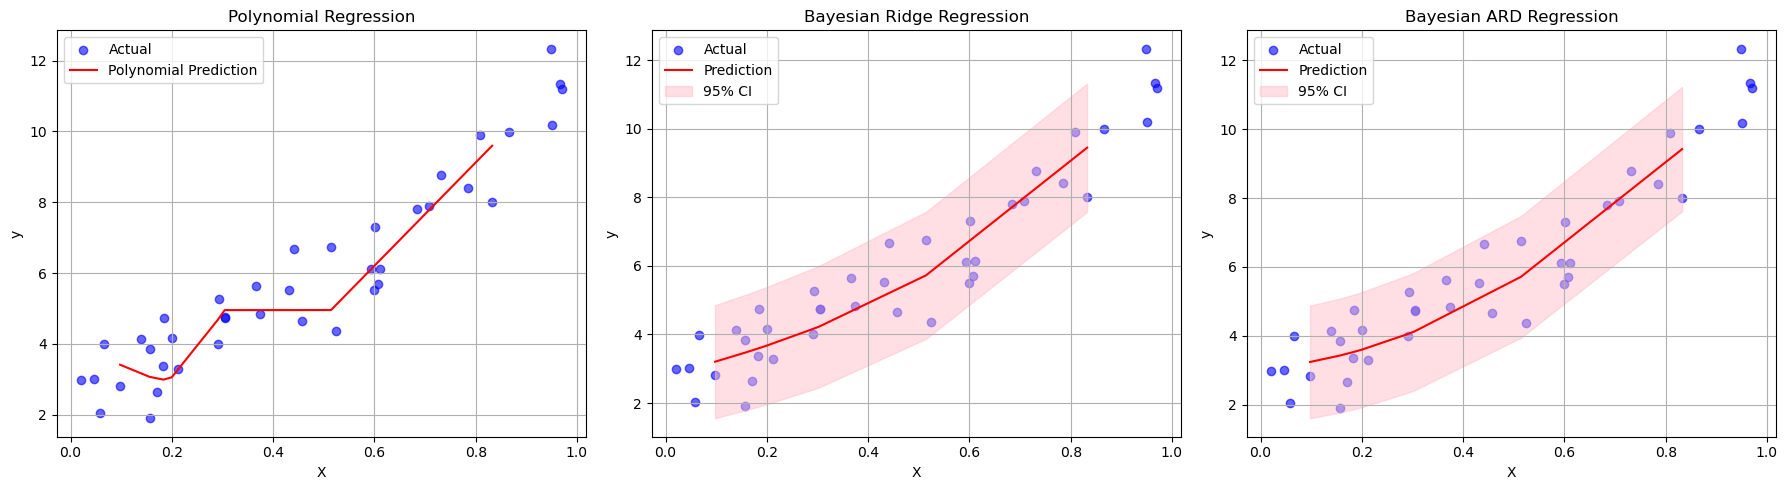

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, BayesianRidge, ARDRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# ============ Make synthetic data ============
noise_factor = 0.9
np.random.seed(42)

X = np.random.rand(40, 1)
y = 3 + 4*X + X**2 + 4*X**3 + noise_factor * np.random.randn(40, 1)

# Polynomial features
poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, train_size=0.8, random_state=42)

# ============= Linear Regression ===============
poly_model = LinearRegression()
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

print("Simple Polynomial Regression Results:")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred_poly):.4f}")
print(f"R2 value: {r2_score(y_test, y_pred_poly):.4f}")

# =============== Bayesian Ridge ===============
bayes_model = BayesianRidge()
bayes_model.fit(X_train, y_train)
y_pred_baye, y_std_baye = bayes_model.predict(X_test, return_std=True)

print("\nBayesian Regression (BayesianRidge) Results:")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred_baye):.4f}")
print(f"R2 value: {r2_score(y_test, y_pred_baye):.4f}")

# =============== ARD Regression ===============
ard_model = ARDRegression()
ard_model.fit(X_train, y_train)
y_pred_ard, y_std_ard = ard_model.predict(X_test, return_std=True)

print("\nBayesian Regression (ARDRegression) Results:")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred_ard):.4f}")
print(f"R2 value: {r2_score(y_test, y_pred_ard):.4f}")

# =============== Plotting ===============

# Sort X_test and predictions by X[:, 0] for smooth curves
X_test_original = X_test[:, 0]  # Original (non-poly) feature
sorted_idx = np.argsort(X_test_original)
X_sorted = X_test_original[sorted_idx]

# Sort predictions and std
y_pred_poly_sorted = y_pred_poly[sorted_idx]
y_pred_baye_sorted = y_pred_baye[sorted_idx]
y_baye_std_sorted = y_std_baye[sorted_idx]
y_pred_ard_sorted = y_pred_ard[sorted_idx]
y_ard_std_sorted = y_std_ard[sorted_idx]

# Calculate 95% confidence intervals
z = 1.96
baye_upper = y_pred_baye_sorted + z * y_baye_std_sorted
baye_lower = y_pred_baye_sorted - z * y_baye_std_sorted
ard_upper = y_pred_ard_sorted + z * y_ard_std_sorted
ard_lower = y_pred_ard_sorted - z * y_ard_std_sorted

# Plot
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# --- Polynomial Regression Plot ---
ax[0].scatter(X[:, 0], y, color='blue', alpha=0.6, label='Actual')
ax[0].plot(X_sorted, y_pred_poly_sorted, color='red', label='Polynomial Prediction')
ax[0].set_title('Polynomial Regression')
ax[0].set_xlabel('X')
ax[0].set_ylabel('y')
ax[0].legend()
ax[0].grid(True)

# --- Bayesian Ridge Plot ---
ax[1].scatter(X[:, 0], y, color='blue', alpha=0.6, label='Actual')
ax[1].plot(X_sorted, y_pred_baye_sorted, color='red', label='Prediction')
ax[1].fill_between(X_sorted, baye_lower, baye_upper,
                   color='pink', alpha=0.5, label='95% CI')
ax[1].set_title('Bayesian Ridge Regression')
ax[1].set_xlabel('X')
ax[1].set_ylabel('y')
ax[1].legend()
ax[1].grid(True)

# --- ARD Regression Plot ---
ax[2].scatter(X[:, 0], y, color='blue', alpha=0.6, label='Actual')
ax[2].plot(X_sorted, y_pred_ard_sorted, color='red', label='Prediction')
ax[2].fill_between(X_sorted, ard_lower, ard_upper,
                   color='pink', alpha=0.5, label='95% CI')
ax[2].set_title('Bayesian ARD Regression')
ax[2].set_xlabel('X')
ax[2].set_ylabel('y')
ax[2].legend()
ax[2].grid(True)

plt.tight_layout()
plt.show()


Linear Regression -> RMSE: 45.0765, R²: -0.0580
Bayesian Ridge -> RMSE: 43.4964, R²: 0.0149
ARD Regression -> RMSE: 43.4098, R²: 0.0188

Top coefficients comparison:
                     Feature  LinearRegression  BayesianRidge  ARDRegression
18            restecg_normal     -1.603403e+16      -1.908279       0.000214
19  restecg_st-t abnormality     -1.603403e+16      -3.096215      -0.001435
17    restecg_lv hypertrophy     -1.603403e+16       5.004493       8.376824
20               exang_False     -7.745157e+15      -3.166044      -1.983539
21                exang_True     -7.745157e+15       3.166044       1.983539
12        cp_atypical angina     -3.145296e+15      -3.126533      -0.004181
14         cp_typical angina     -3.145296e+15      -1.075599      -0.000583
13            cp_non-anginal     -3.145296e+15      -0.267629       0.000756
11           cp_asymptomatic     -3.145296e+15       4.469762       6.923362
16                  fbs_True      2.083170e+15       4.509636   

/Users/nguyennguyen/Documents/Clinical Bioinfo/MLAI/BayesianLinearRegression/Nguyen_data_processor.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace = True)


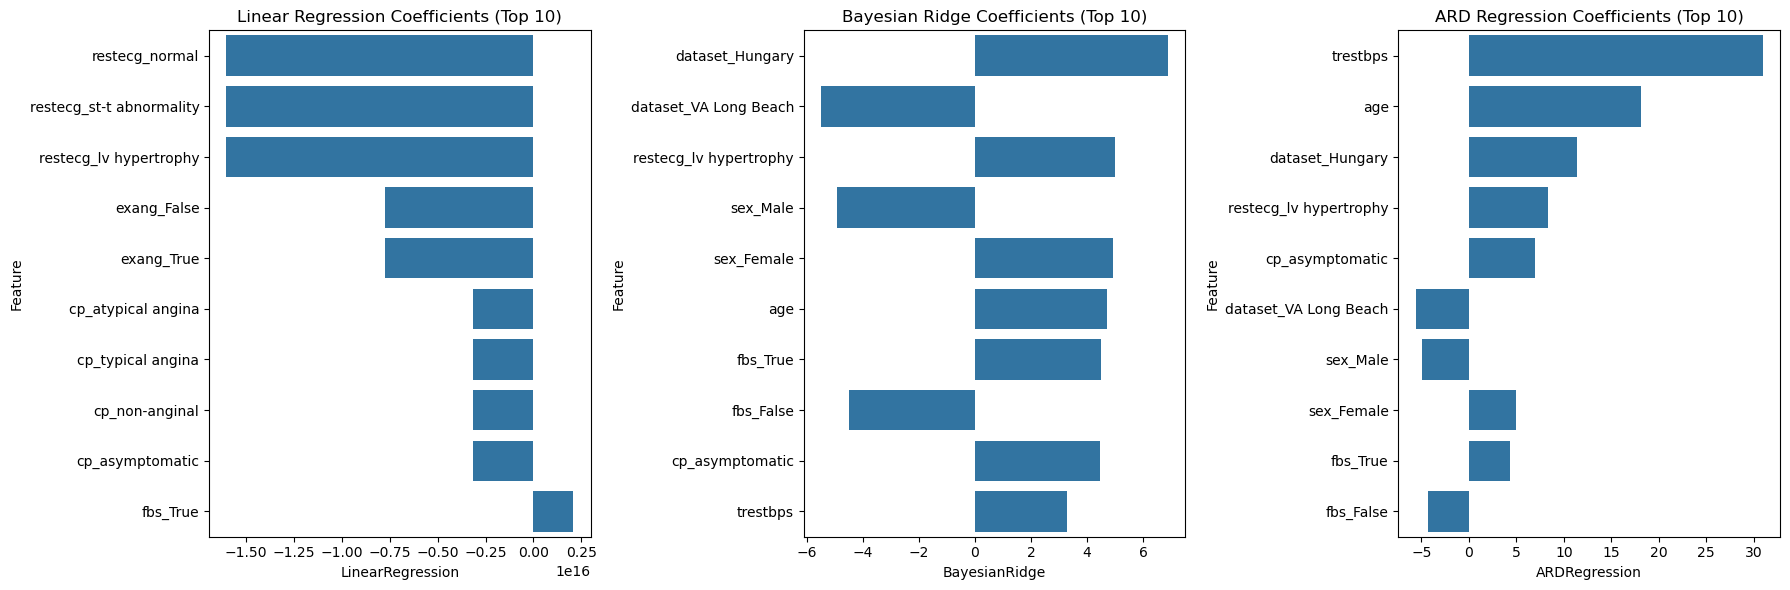

In [ ]:
# ======================= Importing packages ==============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge, ARDRegression
from sklearn.metrics import mean_squared_error, r2_score
import Data_processor as dp  # Custom preprocessing module

# ====================== 1. Load & Clean Data ============================
data = pd.read_csv('Data/heart_disease_uci.csv')
clean_data = data.copy()

# Fix zero values in cholesterol
clean_data.loc[clean_data['chol'] == 0, 'chol'] = np.nan

# Apply custom cleaning
clean_data = dp.remove_missing_columns(clean_data)
clean_data = dp.impute_missing_values(clean_data)
clean_data = dp.remove_duplicates(clean_data)
clean_data = dp.remove_redundant_features(clean_data)
clean_data = dp.impute_outlier(clean_data, method='mean', threshold=2.5)

# Save cleaned dataset
clean_data.to_csv('Data/cleaned_heart_disease_uci.csv', index=False)

# ======================== 2. Prepare Modeling Data ============================
reg_data = clean_data.copy()
reg_data.dropna(inplace=True)

target = reg_data['chol']
features = reg_data.drop(columns=['chol'])

# Normalize and encode
features = dp.normalize_data(features, method='minmax')
cat_cols = features.select_dtypes(include='object').columns
features = pd.get_dummies(features, columns=cat_cols, prefix=cat_cols)

x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=0.8, random_state=42)

# ============================ 3. Train Models ============================
lin_reg = LinearRegression()
bayes_ridge = BayesianRidge()
ard_reg = ARDRegression()

lin_reg.fit(x_train, y_train)
bayes_ridge.fit(x_train, y_train)
ard_reg.fit(x_train, y_train)

# Predictions
y_pred_lin = lin_reg.predict(x_test)
y_pred_bayes = bayes_ridge.predict(x_test)
y_pred_ard = ard_reg.predict(x_test)

# ============================== 4. Evaluate Models ================================
def evaluate_model(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} -> RMSE: {rmse:.4f}, R²: {r2:.4f}")
    return rmse, r2

rmse_lin, r2_lin = evaluate_model("Linear Regression", y_test, y_pred_lin)
rmse_bayes, r2_bayes = evaluate_model("Bayesian Ridge", y_test, y_pred_bayes)
rmse_ard, r2_ard = evaluate_model("ARD Regression", y_test, y_pred_ard)

# ============================== 5. Compare Coefficients ================================
coeffs = pd.DataFrame({
    'Feature': features.columns,
    'LinearRegression': lin_reg.coef_,
    'BayesianRidge': bayes_ridge.coef_,
    'ARDRegression': ard_reg.coef_
}).sort_values(by='LinearRegression', key=abs, ascending=False)

print("\nTop coefficients comparison:")
print(coeffs.head(10))

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# ----- Linear Regression -----
sns.barplot(y='Feature', 
            x='LinearRegression', 
            data=coeffs.sort_values('LinearRegression', key=abs, ascending=False).head(10), 
            ax=axs[0])
axs[0].set_title("Linear Regression Coefficients (Top 10)")

# ----- Bayesian Ridge ----- 
sns.barplot(y='Feature', 
            x='BayesianRidge', 
            data=coeffs.sort_values('BayesianRidge', key=abs, ascending=False).head(10), 
            ax=axs[1])
axs[1].set_title("Bayesian Ridge Coefficients (Top 10)")

# ----- ARD Regression -----
sns.barplot(y='Feature', 
            x='ARDRegression', 
            data=coeffs.sort_values('ARDRegression', key=abs, ascending=False).head(10), 
            ax=axs[2])
axs[2].set_title("ARD Regression Coefficients (Top 10)")

plt.tight_layout()
plt.show()
